In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [84]:
df = pd.read_csv("data/info_fornecedores.csv")

In [85]:
df.columns

Index(['dimensao_peca', 'fornecedor'], dtype='object')

# Análise Descritiva
Boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


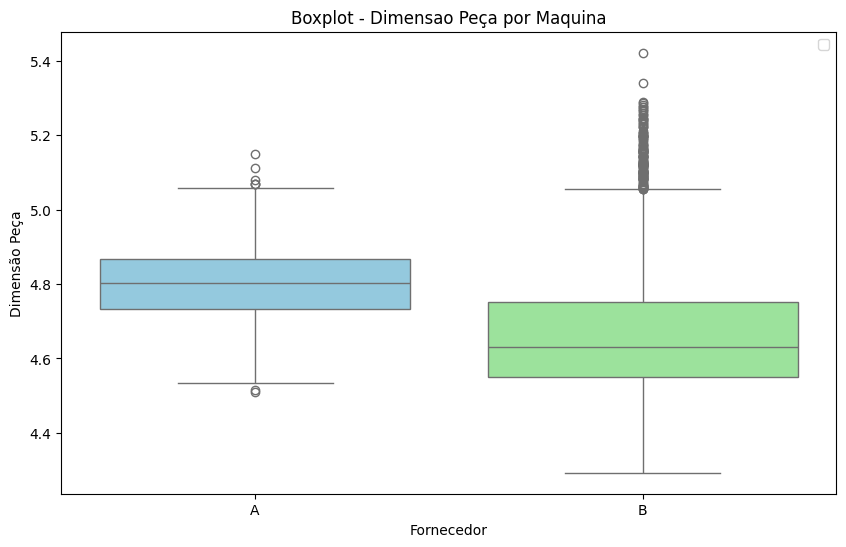

In [86]:
def plot_box_plot(df):
    colors = ['#87CEEB', '#90EE90']

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fornecedor', y='dimensao_peca', data=df, palette=colors, hue='fornecedor', dodge=False, linewidth=1)

    # Plot horizontal line at 4.8
    #plt.axhline(y=4.8, color='k', linestyle='--', label='Target Value', linewidth=1)
    #plt.axhline(y=(4.8 + 1.8), color='r', linestyle='--', label='Upper Limit', linewidth=0.5)
    #plt.axhline(y=(4.8 - 1.8), color='r', linestyle='--', label='Lower Limit', linewidth=0.5)

    plt.title('Boxplot - Dimensao Peça por Maquina')
    plt.xlabel('Fornecedor')
    plt.ylabel('Dimensão Peça')
    plt.legend(loc='upper right')
    plt.show()

plot_box_plot(df)

Histograma

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


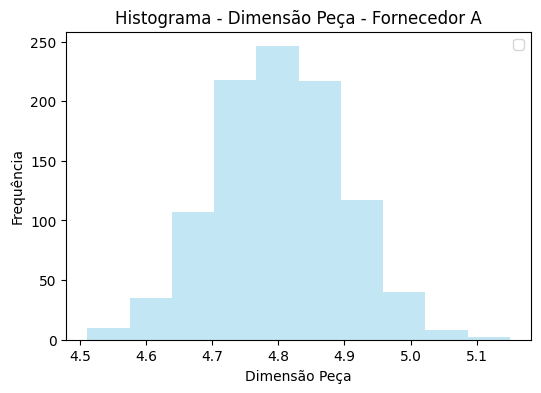

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


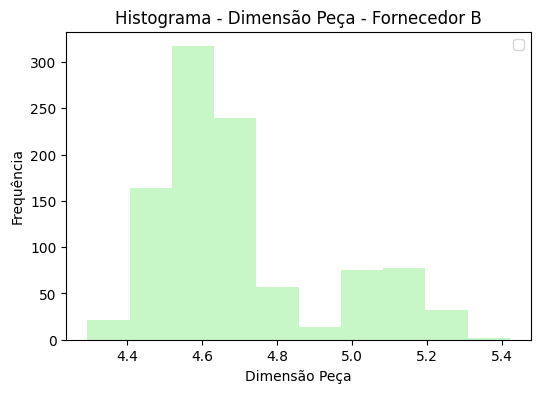

In [87]:
def plot_histograms(df):
    colors = ['#87CEEB', '#90EE90']

    for i, fornecedor in enumerate(df['fornecedor'].unique()):
        supplier_data_dimensao = df[df['fornecedor'] == fornecedor]['dimensao_peca']
        plt.figure(figsize=(6, 4))
        
        plt.hist(supplier_data_dimensao, bins=10, alpha=0.5, color=colors[i])
        

        #plt.axvline(x=4.8 - 1.8, color='k', linestyle='--', label='Lower Limit', linewidth=1)
        #plt.axvline(x=4.8 + 1.8, color='k', linestyle='--', label='Upper Limit', linewidth=1)
        
        plt.title(f'Histograma - Dimensão Peça - Fornecedor {fornecedor}')
        plt.xlabel('Dimensão Peça')
        plt.ylabel('Frequência')
        plt.legend()
        plt.show()
        
plot_histograms(df)

# Analisando a média

In [88]:
df.groupby('fornecedor')['dimensao_peca'].agg(['mean'])

,mean
fornecedor,
A,4.801864
B,4.697762


# Estimação de erro

In [89]:
def calculate_error(df):
    df['error'] = 0
    df.loc[(df['dimensao_peca'] > (4.8 + 0.3)) | (df['dimensao_peca'] < (4.8 - 0.3)), 'error'] = 1
    return

calculate_error(df)

df.groupby('fornecedor')['error'].agg(['mean'])

,mean
fornecedor,
A,0.002
B,0.232


# Teste de Hipótese

Hipótese Nula (H0): Não existe diferença significativa entre as médias de erros entre o Fornecedor A e o Fornecedor B.

Hipótese Alternativa (H1): Existe significância entre as médias de erros.

In [90]:
import statsmodels.formula.api as smf

result = smf.ols('error ~ fornecedor', data=df).fit()

print(result.summary().tables[1])


                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0020      0.009      0.211      0.833      -0.017       0.021
fornecedor[T.B]     0.2300      0.013     17.126      0.000       0.204       0.256


# Teste de H

# -----------------------------------

In [93]:
# Definir os parâmetros para os dados dos fornecedores
sample_data_A = {'mean': 4.8, 'fornecedor': 'A'}  # Média de 4.8 e poucos outliers para o fornecedor A
sample_data_B = {'mean': 4.6, 'fornecedor': 'B'}   # Média de 4.6 e mais outliers que A para o fornecedor B

# Gerar os dados

# Realizar o teste de hipótese para o fornecedor A
t_statistic_A, p_value_A = stats.ttest_1samp(df[df['fornecedor'] == 'A']['dimensao_peca'], sample_data_A['mean'])

# Realizar o teste de hipótese para o fornecedor B
t_statistic_B, p_value_B = stats.ttest_1samp(df[df['fornecedor'] == 'B']['dimensao_peca'], sample_data_B['mean'])

# Exibir os resultados
print("Teste de Hipótese para o Fornecedor A:")
print("Estatística do Teste t:", t_statistic_A)
print("Valor p:", p_value_A)

print("\nTeste de Hipótese para o Fornecedor B:")
print("Estatística do Teste t:", t_statistic_B)
print("Valor p:", p_value_B)

Teste de Hipótese para o Fornecedor A:
Estatística do Teste t: 0.6065202419921144
Valor p: 0.5443071444926442

Teste de Hipótese para o Fornecedor B:
Estatística do Teste t: 13.821063301242074
Valor p: 6.9235101899666326e-40
